**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
import random
from datetime import datetime
from scipy import sparse
#from scipy.sparse import csr matrix

warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Dataset1**

In [2]:
df=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t', names=['user_id','song_id','frequency'])

In [3]:
df.head(5)

,user_id,song_id,frequency
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
df.describe()

,frequency
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


**Dataset2**

In [5]:
df1=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id', 'song_id', 'artist_name', 'release'])

In [6]:
df1.head(5)

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [7]:
df1.describe()

,track_id,song_id,artist_name,release
count,1000000,1000000,1000000,999985
unique,1000000,999056,72665,702000
top,TRNTHTS128F9354BCB,SONMIKP12A58A7E1FF,Michael Jackson,Intro
freq,1,3,194,1511


**CHECKING MISSING VALUERS AND DUPLICATES**

In [8]:
print(df.isna().sum())
print(df1.isna().sum())

user_id      0
song_id      0
frequency    0
dtype: int64
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64


In [9]:
df.duplicated().sum()

0

In [10]:
df1.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['song_id'].duplicated().sum()

1287727

In [13]:
df1['song_id'].duplicated().sum()

944

**MERGING THE DATA**

In [14]:
df2 = pd.merge(df, df1, on='song_id', how='left')

In [15]:
df2.to_csv(r'C:\Users\admin\OneDrive\Desktop\kaggle\original.csv')

In [16]:
df2.head(15)

,user_id,song_id,frequency,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,TRWBSCZ128F932F2F9,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,TRCQXMT128E0786397,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,TRZLFVB128F429FED0,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,TRIKCQI128F92DDC16,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,TRTBQQG128F9339E23,UDG,Kurtizana


In [17]:
df2.shape

(1491952, 6)

In [18]:
df2.describe()

,frequency
count,1.491952e+06
mean,3.179719e+00
std,7.015023e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


**Basic stastistics**

In [19]:
print("Total no of uniques",df2.shape[0])
print('Total no of users:',df2['user_id'].unique().shape[0])
print('Total no of songs:',df2['song_id'].unique().shape[0])
print('Total no of frequency:',df2['frequency'].unique().shape[0])
print('Total no of track:',df2['track_id'].unique().shape[0])
print('Total no of artist name:',df2['artist_name'].unique().shape[0])
print('Total no of release:',df2['release'].unique().shape[0])

Total no of uniques 1491952
Total no of users: 110000
Total no of songs: 163206
Total no of frequency: 299
Total no of track: 163828
Total no of artist name: 28367
Total no of release: 137671


In [20]:
df2.describe(include='all')

,user_id,song_id,frequency,track_id,artist_name,release
count,1491952,1491952,1.491952e+06,1491952,1491952,1491951
unique,110000,163206,NaN,163828,28367,137670
top,316110734d8da7478cc33237458814f770a9eb7a,SOFRQTD12A81C233C0,NaN,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,57,5043,NaN,5043,13675,5043
mean,NaN,NaN,3.179719e+00,NaN,NaN,NaN
std,NaN,NaN,7.015023e+00,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,1.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,3.000000e+00,NaN,NaN,NaN


**Frequency of distribution**

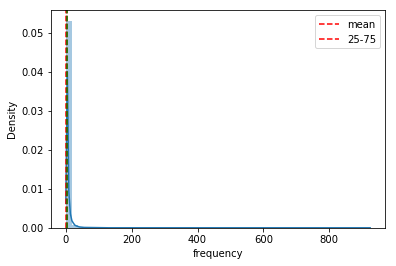

In [21]:
sns.distplot(df2["frequency"])
plt.axvline(x=np.mean(df["frequency"]),c="red",ls="--",label="mean")
plt.axvline(x=np.percentile(df["frequency"],25),c="red",ls="--",label="25-75")
plt.axvline(x=np.percentile(df["frequency"],75),c="green",ls="--")
plt.legend()

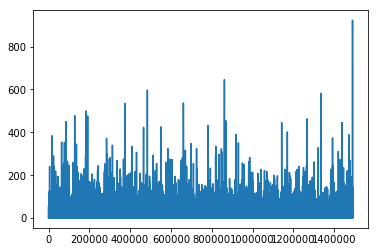

In [22]:
plt.plot(df2['frequency'])

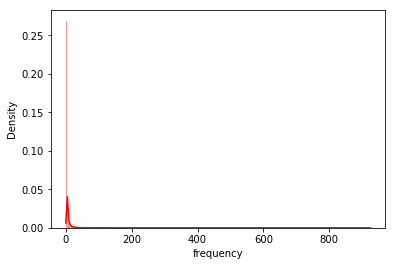

In [23]:
sns.distplot(df['frequency'],bins=299,kde=True,color='red')

**TOP 10 SONGS REPEATED**

In [24]:
print("Top 10 songs repeated")
df.song_id.value_counts()[:10]

Top 10 songs repeated


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
SONYKOW12AB01849C9    3430
SOEGIYH12A6D4FC0E3    3272
SODJWHY12A8C142CCE    2791
SOLFXKT12AB017E3E0    2725
SOFLJQZ12A6D4FADA6    2668
Name: song_id, dtype: int64

**NO OF SONGS LISTENED**

In [25]:
df['user_id'].unique()

array(['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d',
       'd7083f5e1d50c264277d624340edaaf3dc16095b',
       'd68dc6fc25248234590d7668a11e3335534ae4b4', ...,
       'ab79461415bb9db956def3a897886d0754ddddfb',
       'fc072bde2043756ea30ff07e4a5311e34825b4df',
       '5e650759ebf89012044c6d52121eeada8b0ec814'], dtype=object)

In [26]:
song_user=df2.groupby('user_id')['song_id'].count()
song_user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                            ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    13
Name: song_id, Length: 110000, dtype: int64

In [27]:
song_user.sort_values().head()

user_id
b4f681dac463c297568bffe7f4b646b74a5e6d0d    5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d    5
d1764e1f4626164793d400b95efb4a5f80a06cf9    5
d1776bb80cf8298288974c52f903cc3b9601761a    5
98d00906e235bede8d2b14b9cf5b802ee2438231    5
Name: song_id, dtype: int64

In [28]:
song_user.describe()

count    110000.000000
mean         13.563200
std           8.321648
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: song_id, dtype: float64

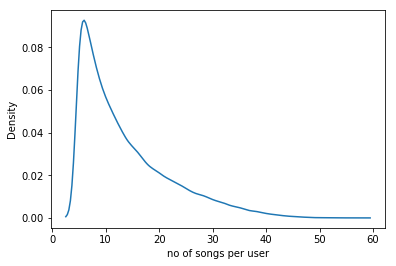

In [29]:
plt.xlabel("no of songs per user")
sns.kdeplot(song_user)
plt.show()

In [30]:
df2.groupby(['user_id', 'frequency'])
  
print(df2.groupby(['user_id', 'frequency']).groups)

{('00007a02388c208ea7176479f6ae06f8224355b3', 1): [742001, 742002, 742003, 742004, 742006, 742008], ('00007a02388c208ea7176479f6ae06f8224355b3', 2): [742005, 742007], ('00007a02388c208ea7176479f6ae06f8224355b3', 3): [742000], ('00014a76ed063e1a749171a253bca9d9a0ff1782', 1): [1471727, 1471729, 1471730, 1471731, 1471732, 1471734, 1471736, 1471737], ('00014a76ed063e1a749171a253bca9d9a0ff1782', 2): [1471728], ('00014a76ed063e1a749171a253bca9d9a0ff1782', 4): [1471735], ('00014a76ed063e1a749171a253bca9d9a0ff1782', 10): [1471733], ('00015189668691680bb1a2e58afde1541ec92ced', 1): [1151290, 1151293], ('00015189668691680bb1a2e58afde1541ec92ced', 2): [1151288, 1151298], ('00015189668691680bb1a2e58afde1541ec92ced', 3): [1151283], ('00015189668691680bb1a2e58afde1541ec92ced', 5): [1151282, 1151284, 1151285, 1151289, 1151296], ('00015189668691680bb1a2e58afde1541ec92ced', 6): [1151294], ('00015189668691680bb1a2e58afde1541ec92ced', 8): [1151295], ('00015189668691680bb1a2e58afde1541ec92ced', 9): [115128

In [31]:
df_group_one = df[['user_id', 'song_id']]

In [32]:
df_group_one['song_id'].sort_values().head()

1026279    SOAAAFI12A6D4F9C66
1261410    SOAAAFI12A6D4F9C66
466551     SOAAAGK12AB0189572
294621     SOAAAGQ12A8C1420C8
561661     SOAAAGQ12A8C1420C8
Name: song_id, dtype: object

**Analysis of famous artist**

In [33]:
artist_song = df2.groupby("artist_name")["song_id"].count()
artist_song

artist_name
!!!                     109
!Deladap                  3
& And Oceans              2
'68 Comeback             22
'N Sync/Phil Collins     48
                       ... 
Étienne Daho             45
Íon                       5
Ólafur Arnalds           78
Órla Fallon               1
Özlem Tekin               1
Name: song_id, Length: 28367, dtype: int64

In [34]:
artist_song.sort_values().tail(20)

artist_name
Harmonia                   5046
Guns N' Roses              5061
Björk                      5144
Evanescence                5170
Daft Punk                  5411
John Mayer                 5452
The Killers                5721
Radiohead                  5764
Linkin Park                5846
OneRepublic                6027
The Black Keys             6507
Train                      6617
Taylor Swift               7435
Jack Johnson               7465
Muse                       7916
Eminem                     8160
Florence + The Machine     8213
Justin Bieber              9259
Kings Of Leon             11586
Coldplay                  13675
Name: song_id, dtype: int64

**Analysis on Popular Song**

In [35]:
pop_song = df2.groupby("release")["track_id"].count()
pop_song

release

Ef Ég Hefði Aldrei...                                        1

Light Mass Prayers                                           4

The Arsonist Story":  Evil Craves Attention/Our Son/10x10    1

Ég Átti Gráa Æsku                                            4
 (Jack The Stripper)                                          2
                                                             ..
Þú ert jörðin                                                 2
Þú ert sólin                                                  2
ça Me Fait Du Bien                                            2
étienne d'août                                                4
þetta Gerist á Bestu Bæjum                                    1
Name: track_id, Length: 137670, dtype: int64

In [36]:
df2.isnull().sum()

user_id        0
song_id        0
frequency      0
track_id       0
artist_name    0
release        1
dtype: int64

In [37]:
pop_song.sort_values().head()

release

Ef Ég Hefði Aldrei...       1
Makin' me hot                1
Makin' Money                 1
Makin' Magic                 1
Makin' Love To A Murderer    1
Name: track_id, dtype: int64

In [38]:
pop_song.sort_values().tail(20)

release
Marry Me                                                               2013
Bring Me To Life                                                       2046
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   2097
Drop The World                                                         2226
OMG                                                                    2260
Nothin' On You [feat. Bruno Mars] (Album Version)                      2346
Yellow                                                                 2631
Love Story                                                             2633
Tive Sim                                                               2669
Fireflies                                                              2745
Hey_ Soul Sister                                                       2791
Somebody To Love                                                       3263
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Secr

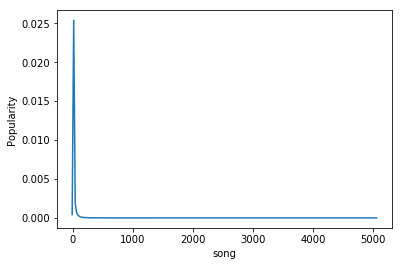

In [39]:
sns.kdeplot(data=pop_song)
plt.ylabel('Popularity')
plt.xlabel('song')
plt.show()

**HISTOGRAM**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B9C352EB0>]],
      dtype=object)

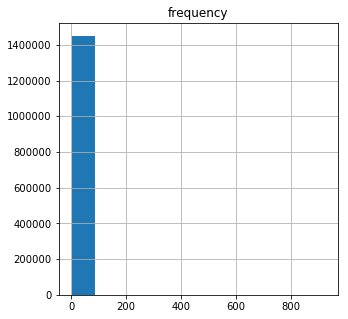

In [40]:
df.hist(figsize=(5,5),bins=11)

**Small analysis through tableau**

<img src="tab.png" alt="Tableau">